In [1]:
BOLD = '\033[1m'
END = '\033[0m'
print(BOLD + 'Forest Fire Predictor\n')
file_path = 'forest.txt'
with open(file_path, 'r') as file:
    content = file.read()
    print(content)

print("By- Divjot Singh Manchanda")
print("RA2211047010131")
print("Artificial Intelligence")
print("Section B")
print("Under Dr.Sheryl Oliver" + END)

Forest Fire Predictor

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%/%%%%%%%/%%%%%%%%%%%%(%%%/%%%%%%%%/%%%%%(%%%%%%%%%%%%%(#%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%/%%%%%%%#%%%%%%%%%%%%%%/%/#%%%%%%%(%%%%%/*%%%%%%%%%%%%(/%%%%%%%%%%%%%(*
%%%%%%%%%%%%%(*/#%%%%%%%%%%%%/%%%%%%/%%%%%%%%%%%%%%%%**/%%%%%%*##%%(***/#%%%%%%%%%%#/%%%%%(%%%%%%/*/
%%%%%%%%%%%%%///%%%%%%%%%%%%%*%%%%%/*#%%%%%%%%%%%%%%%%(/%%%%%/%%%%%***///%%%%%%%%%%%/%%%%%//%%&%/***
%%%%%%%%%%%%%**//#&%%%%%%%%/%/(%%%*/%%%%%%#%%%%%%%%%%%#/%%%/#%%%%(****/*///(#%%%%%%%*%%%%%/%%%/****/
%%%%%%%%%%%/*////////%%%%%%%%//%//#%%%%%%%%%%%%%%%%%%%#/%//%%%%%%#***//*/*(%%%%%%%%%*#%%(/%%%%%/***/
%%%%%%%%%/**//*//*/%%%%%%%%%%////%%%%%%%%%%/%%%%%%%%%%%*//%%%%%%%/***//////#%%%%%%%%////%%%%%%%%/**/
%%%%%%%%%%/***///**/#%%%%%%%%//%%%%%%%%%%#/%//%%%%%%%%%*(%%%%%%%(****/*//*//##%%%%%%//%%%%%%%%&%%**/
%%%%%%%%%%(**/*/////(%%%%%%%%//%%%%%%%%%/%%%/%%%(%%%%%%*/%%%%%%%#(/**////////((#%%%%//%%%%%%/**///**
%%%%%%%%%%%/**//***(%%%%%%%%%/*%%%%%%%#%%%%%(%%%%%%%%%%*/%%%#/******

In [2]:
# Initializing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Loading the dataset
data = pd.read_csv('ForestFireDataset.csv')
data

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Test Forest 1,40,45,20,1
1,Test Forest 2,50,30,10,1
2,Test Forest 3,10,20,70,0
3,Test Forest 4,60,45,70,1
4,Test Forest 5,30,48,10,1
...,...,...,...,...,...
229,Test Forest 230,30,51,2,1
230,Test Forest 231,60,60,10,1
231,Test Forest 232,10,10,60,0
232,Test Forest 233,0,30,0,0


In [4]:
# Exploratory data analysis
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             234 non-null    object
 1   Oxygen           234 non-null    int64 
 2   Temperature      234 non-null    int64 
 3   Humidity         234 non-null    int64 
 4   Fire Occurrence  234 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.3+ KB
None
           Oxygen  Temperature    Humidity  Fire Occurrence
count  234.000000   234.000000  234.000000       234.000000
mean    33.846154    33.794872   36.282051         0.512821
std     23.478824    16.050638   27.744341         0.500907
min      0.000000     0.000000    0.000000         0.000000
25%     11.000000    20.000000   12.000000         0.000000
50%     30.000000    35.000000   30.000000         1.000000
75%     50.000000    45.000000   65.000000         1.000000
max     89.000000    60.000000  100.000000    

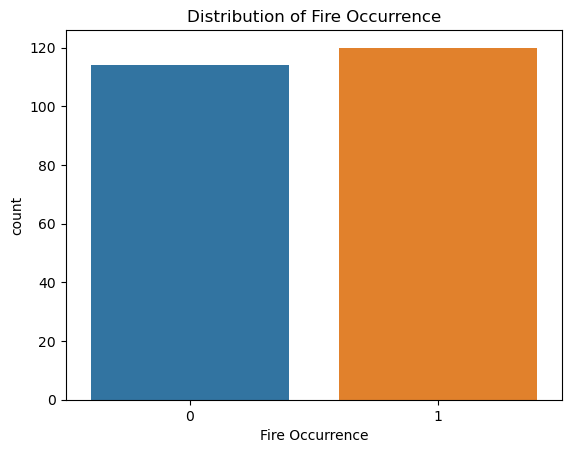

In [5]:
sns.countplot(x='Fire Occurrence', data=data)
plt.title('Distribution of Fire Occurrence')
plt.show()

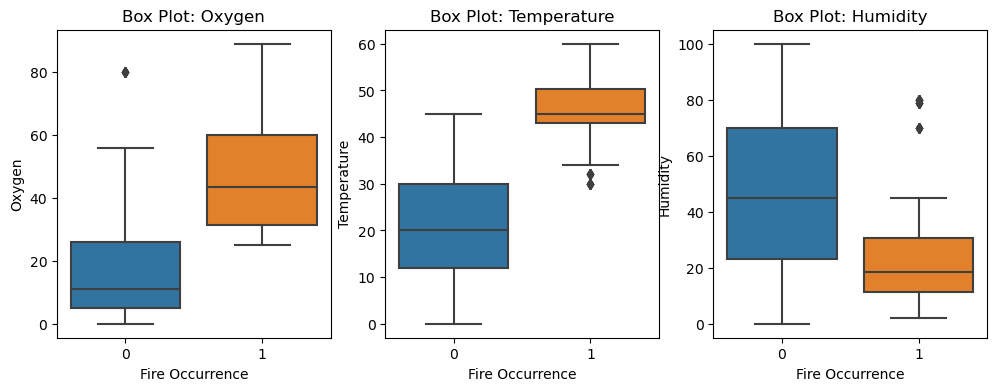

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the box plots
sns.boxplot(x='Fire Occurrence', y='Oxygen', data=data, ax=axes[0])
sns.boxplot(x='Fire Occurrence', y='Temperature', data=data, ax=axes[1])
sns.boxplot(x='Fire Occurrence', y='Humidity', data=data, ax=axes[2])

# Set the titles
axes[0].set_title('Box Plot: Oxygen')
axes[1].set_title('Box Plot: Temperature')
axes[2].set_title('Box Plot: Humidity')

# Show the plot
plt.show()

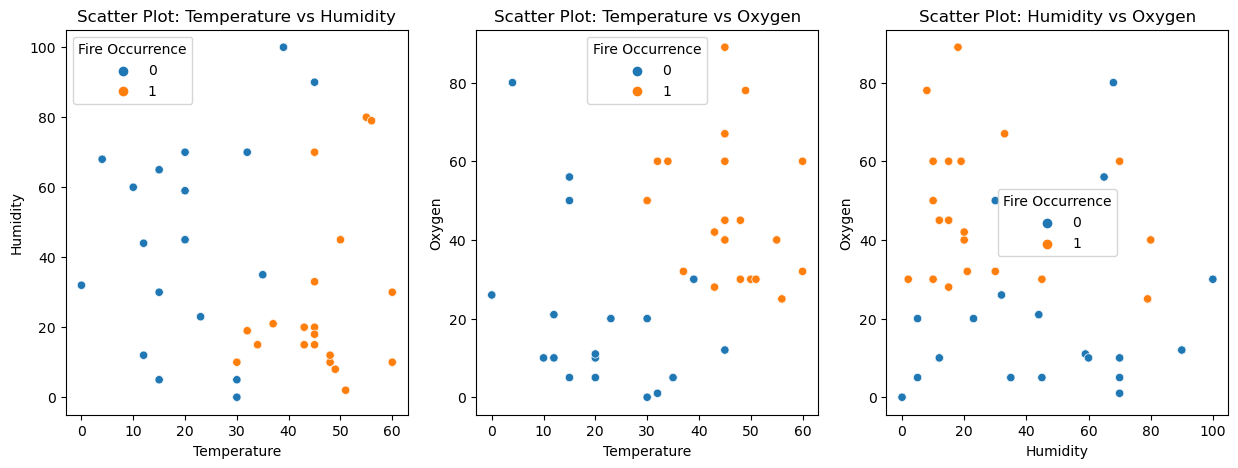

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the scatter plots
sns.scatterplot(x='Temperature', y='Humidity', data=data, hue='Fire Occurrence', ax=axes[0])
sns.scatterplot(x='Temperature', y='Oxygen', data=data, hue='Fire Occurrence', ax=axes[1])
sns.scatterplot(x='Humidity', y='Oxygen', data=data, hue='Fire Occurrence', ax=axes[2])

# Set the titles
axes[0].set_title('Scatter Plot: Temperature vs Humidity')
axes[1].set_title('Scatter Plot: Temperature vs Oxygen')
axes[2].set_title('Scatter Plot: Humidity vs Oxygen')
plt.show()

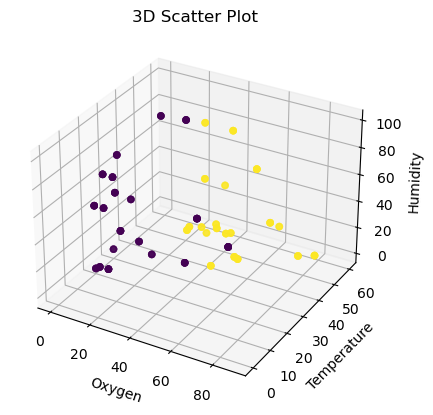

In [8]:
# Making 3D scatter plot
X = data.iloc[1:, 1]
Y = data.iloc[1:, 2]
Z = data.iloc[1:, 3]
C = data.iloc[1:, -1]

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c=C)

ax.set_xlabel('Oxygen')
ax.set_ylabel('Temperature')
ax.set_zlabel('Humidity')
ax.set_title('3D Scatter Plot')

# Printing plot
plt.show()


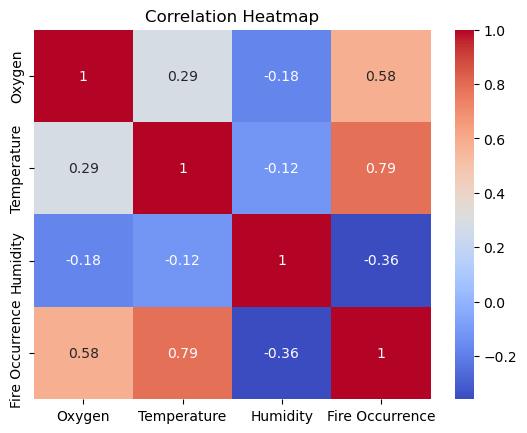

In [9]:
# Correlation Heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Data Processing
x = data.iloc[1:, 1:-1]
y = data.iloc[1:, -1]

In [11]:
# Spliting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=42)

In [12]:
# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train.values, y_train)
log_pred = log_reg.predict_proba(X_test.values)
log_pred = np.transpose(log_pred)[1]
log_pred = [1 if p > 0.5 else 0 for p in log_pred]# Convert to binary predictions
log_accuracy = accuracy_score(y_test, log_pred)

In [13]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train.values, y_train)
linear_pred = linear_model.predict(X_test)
linear_pred = [1 if p > 0.5 else 0 for p in linear_pred]  # Convert to binary predictions
linear_accuracy = linear_model.score(X_train.values,y_train)

In [14]:
# K-Nearest Neighbors (KNN) model
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k, algorithm='auto', weights='uniform', p=2)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [15]:
# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [16]:
# Neural Network model
nn_model = MLPClassifier()
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

In [17]:
# Support Vector Machines (SVM) model
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [18]:
# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

In [19]:
# Comparing accuracies
print("Logistic Regression Accuracy:", log_accuracy)
print("Linear Regression Accuracy:", linear_accuracy)
print("K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Neural Network Accuracy:", nn_accuracy)
print("Support Vector Machines (SVM) Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 1.0
Linear Regression Accuracy: 0.7885217051399098
K-Nearest Neighbors (KNN) Accuracy: 0.9428571428571428
Random Forest Accuracy: 0.9657142857142857
Neural Network Accuracy: 0.9314285714285714
Support Vector Machines (SVM) Accuracy: 0.8857142857142857
Decision Tree Accuracy: 0.8628571428571429


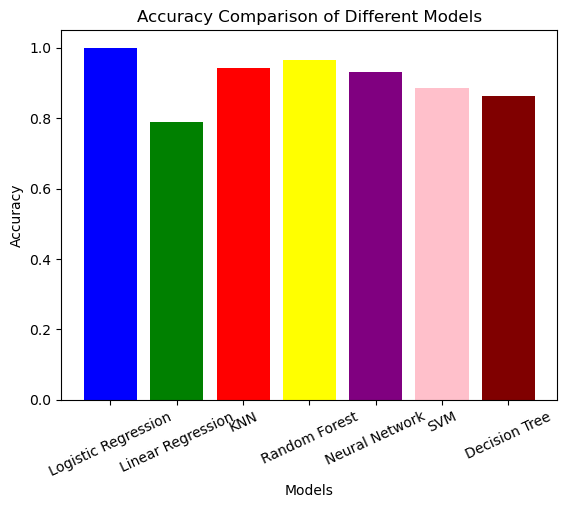

In [20]:
# Evaluating the models
accuracy_scores = {
    'Logistic Regression': log_accuracy,
    'Linear Regression': linear_accuracy,
    'KNN': knn_accuracy,
    'Random Forest': rf_accuracy,
    'Neural Network': nn_accuracy,
    'SVM': svm_accuracy,
    'Decision Tree': dt_accuracy
}
colors = ['blue', 'green', 'red','yellow','purple', 'pink', 'maroon']

# Ploting the accuracy scores in a bar graph with different colors
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=25)
plt.show()

In [21]:
#Prediction based on User Value
log_reg = LogisticRegression()
log_reg.fit(X_train.values, y_train)
user_input=[]
user_input.append(int(input("Enter Oxygen ")))
user_input.append(int(input("Enter Temperature ")))
user_input.append(int(input("Enter Humidity ")))
user_test=pd.DataFrame(data=[user_input])
user_pred = log_reg.predict_proba(user_test.values)
user_prob=user_pred[0][1]
print("\n{:.2%}".format(user_prob)+" Probability of Forest Fire")

Enter Oxygen 33
Enter Temperature 34
Enter Humidity 33

56.16% Probability of Forest Fire


In [22]:
print("░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░")
print("░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░")
print("░░░░░╔══╦╗░░░░╔╗░░░░░░╔╗╔╗░░░░░░░░░")
print("░░░░░╚╗╔╣╚╦═╦═╣║╔╗░░░░║║║╠═╦╦╗░░░░░")
print("░░░░░░║║║║╠╝║║║╠╝║░░░░║╚╝║║║║║░░░░░")
print("░░░░░░║║║║║║║║║╔╗╣░░░░╚╗╔╣║║║║░░░░░")
print("░░░░░░╚╝╚╩╩═╩╩╩╝╚╝░░░░░╚╝╚═╩═╝░░░░░")
print("░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░")
print("░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░")

░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
░░░░░╔══╦╗░░░░╔╗░░░░░░╔╗╔╗░░░░░░░░░
░░░░░╚╗╔╣╚╦═╦═╣║╔╗░░░░║║║╠═╦╦╗░░░░░
░░░░░░║║║║╠╝║║║╠╝║░░░░║╚╝║║║║║░░░░░
░░░░░░║║║║║║║║║╔╗╣░░░░╚╗╔╣║║║║░░░░░
░░░░░░╚╝╚╩╩═╩╩╩╝╚╝░░░░░╚╝╚═╩═╝░░░░░
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
